In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pencil as pc
from scipy.optimize import curve_fit
from IPython.display import display, Math, Latex

         pencil has moved to pencil_old.
To change your scripts accordingly:
import pencilnew as pc -> import pencil as pc
import pencil as pc -> import pencil_old as pc


In [2]:
# plt.rcParams['text.usetex'] = True
plt.rcParams.update({'font.size': 11})

In [3]:
# data = np.loadtxt('stratification.dat')

In [4]:
# plt.plot(data[:,0], data[:,1])
# plt.plot(data[:,0], data[:,2])
# plt.xlim(-0.9*np.pi, 0.1*np.pi)
# # plt.yscale('log')

In [5]:
#reading the grid
grid = pc.read.grid(trim=True, quiet=True)
z = grid.z

In [6]:
ts = pc.read.ts()

Read 25564 lines.


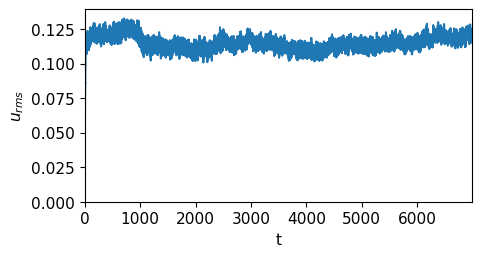

In [7]:
plt.figure(figsize=(5,2.5))
plt.plot(ts.t, ts.urms)
plt.xlim(ts.t[0], ts.t[-1])
plt.ylim(0, )
plt.xlabel("t")
plt.ylabel(r"$u_{rms}$")
plt.show()

In [8]:

#for exp fitting
def f(t, a, b):
    return a*np.exp(t*b)

i1 = np.argmin(abs(ts.t-330))
j1 = np.argmin(abs(ts.t-480))

t_exp = ts.t[i1:j1]
b_exp = ts.brms[i1:j1]

popt1, pcov2 = curve_fit(f, t_exp, b_exp, [0,0.0016])

t_fit1 = ts.t[i1-50:j1+50]
b_fit1 = f(t_fit1, popt1[0], popt1[1])
grow=round(popt1[1],3)
print('grow factor is', grow)

#for st_li2ne fi2tti2ng
def g(t, a, b):
    return a*t+b

i2 = np.argmin(abs(ts.t-800))
j2 = np.argmin(abs(ts.t-1050))

t_lin = ts.t[i2:j2]
b_lin = ts.brms[i2:j2]

popt2, pcov2 = curve_fit(g, t_lin, b_lin)

t_fit2 = ts.t[i2-50:j2+50]
b_fit2 = g(t_fit2, popt2[0], popt2[1])
b_ave = round(np.average(b_fit2),3)
print(r'$\langle B_{rms}\rangle$=', b_ave)

# #for urms
# i3 = np.argmin(abs(ts.t-800))
# j3 = np.argmin(abs(ts.t-150))

# t_lin = ts.t[i3:j3]
# u_lin = ts.urms[i3:j3]

# popt2, pcov2 = curve_fit(g, t_lin, u_lin)

# t_fit3 = ts.t[i3-300:j3+100]
# u_fit3 = g(t_fit3, popt2[0], popt2[1])
# u_ave = round(np.average(u_fit3),3)
# print(r'$\langle u_{rms}\rangle$=', u_ave)

grow factor is 0.014
$\langle B_{rms}\rangle$= 0.024


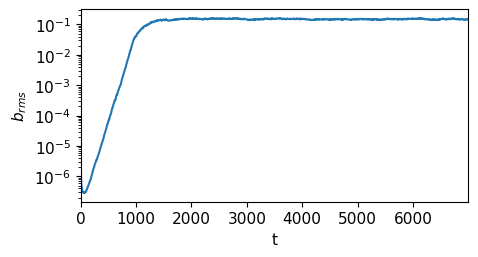

In [9]:
plt.figure(figsize=(5,2.5))
plt.plot(ts.t, ts.brms)

# plt.plot(t_fit1, b_fit1, linewidth=1.5, linestyle = '--', color='r')
# plt.plot(t_fit2, b_fit2, linewidth=1.5, linestyle = '--', color='b')

# plt.text(800,0.01, fr"$B_{{rms}}\approx{b_ave}$", fontsize=14)
# plt.text(460,0.0008, fr"$e^{{{grow}t}}$", fontsize=14)
# plt.annotate("exponential growth", xy=(400, 0.0003), xytext=(450, 0.00002), arrowprops=dict(arrowstyle="->"), fontsize=14)
# plt.annotate("saturation", xy=(950, 5.0), xytext=(900, 0.2), arrowprops=dict(arrowstyle="->"), fontsize=14)

plt.xlim(ts.t[0], ts.t[-1])
plt.yscale('log')
plt.xlabel("t")
plt.ylabel(r"$b_{rms}$")
plt.show()

In [10]:
xya = pc.read.aver(plane_list="xy")
# pre = xya.xy.ppmz
rho = xya.xy.rhomz
# tem = xya.xy.TTmz

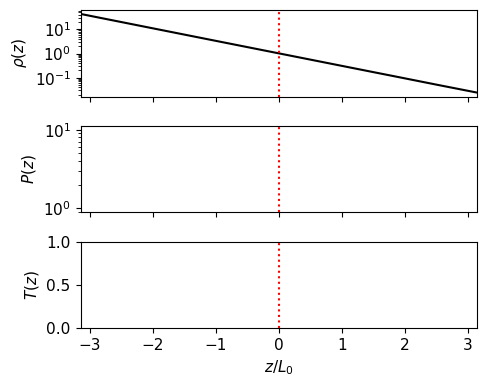

In [11]:
fig, axs = plt.subplots(3,1, figsize=(5,4), sharex=True)

axs[0].plot(z, rho[-1,:], color='k')
# axs[1].plot(z, pre[-1,:], color='k')
# axs[2].plot(z, tem[-1,:], color='k')
# axs[2].plot(z, tem[-200,:], color='k')
for i in range(0,3):
    axs[i].axvline(x=0, c='r', ls=':')

axs[0].set_yscale("log")
axs[1].set_yscale("log")
axs[1].set_xlim(z[0], z[-1])
axs[0].set_ylabel(r"$\rho(z)$")
axs[1].set_ylabel(r"$P(z)$")
axs[2].set_ylabel(r"$T(z)$")

plt.xlabel(r"$z/L_0$")
plt.tight_layout()
#plt.savefig("variation.jpg")

In [12]:
yaver = pc.read.aver(plane_list='y')

ValueError: invalid plane name

In [ ]:
uz_real = yaver.y.uzmxz

In [ ]:
uz_real.shape

(446, 1024, 256)

In [ ]:
indx_t1 = np.argmin(np.abs(yaver.t - 15))  #to avoid the transient effects below t=40
indx_t2 = np.argmin(np.abs(yaver.t - yaver.t[-1]))

In [ ]:
np.shape(yaver.t)

(446,)

In [ ]:
# uz_fourier = mode.FT(uz_real[indx_t1:indx_t2,:,mode.indx_zref], 'ortho')

In [ ]:
uz_fourier = np.fft.fftn(uz_real[indx_t1:indx_t2,:,225], s=None, axes=(-2, -1), norm='ortho')
uz_fourier.shape

(408, 1024)

In [ ]:
logP = np.log(np.abs(uz_fourier))#/D**2))

In [ ]:
size = np.shape(uz_real)
#size
nx = size[1]
nz = size[2]
nt = size[0]

tt = yaver.t
len(grid.x)

1024

In [ ]:
param = pc.read.param()

In [ ]:
lxyz = param.lxyz   #shape of the box
grz = -param.gravz  #value of g along z direction
cp = param.cp
lx = lxyz[0]
ly = lxyz[1]
lz = lxyz[2]
lz

3.141592653589793

In [ ]:
t_gd = tt[indx_t1:indx_t2]  #time interval where urms has reached a steady state
T = np.max(t_gd)-np.min(t_gd)
t_len = np.size(t_gd)

dkx = 2*np.pi/lx    #unit step along kx direction
dom = 2*np.pi/T #unit step alomg omega direction

In [ ]:
if t_len%2 == 0:
    fom = np.arange(0, t_len/2)
    rom = -np.flip(np.arange(1, t_len/2+1))
    om = np.concatenate((fom, rom))*dom
else:
    fom = np.arange(0, t_len/2)
    rom = -np.flip(np.arange(1, t_len/2))
    om = np.concatenate((fom, rom))*dom

In [ ]:
if nx%2 == 0:
    fnx = np.arange(0, nx/2)
    rnx = -np.flip(np.arange(1, nx/2+1))
    kx = np.concatenate((fnx, rnx))*dkx
else:
    fnx = np.arange(0, nx/2)
    rnx = -np.flip(np.arange(1, nx/2))
    kx = np.concatenate((fnx, rnx))*dkx

In [ ]:
k_tilde = kx#*L0
om_tilde = om#/omega0
np.shape(om_tilde), np.shape(k_tilde), np.shape(logP)
# k_tilde

((408,), (1024,), (408, 1024))

In [ ]:
cs_u = 3.154
cs_d = 1.008

Locator attempting to generate 3979 ticks ([-14.636000000000001, ..., 1.2759999999999998]), which exceeds Locator.MAXTICKS (1000).


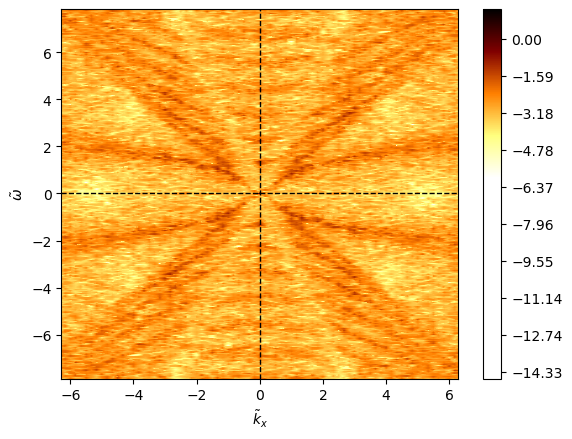

In [ ]:
[X, Y] = np.meshgrid(k_tilde, om_tilde)
#plt.contourf(X, Y, logP, 1500, cmap='inferno', vmin=np.min(logP), vmax=np.max(logP))
# plt.contourf(np.fft.fftshift(X), np.fft.fftshift(Y), np.fft.fftshift(logP), 4000, cmap='afmhot_r', vmin=np.min(logP), vmax=np.max(logP))
plt.contourf(np.fft.fftshift(X), np.fft.fftshift(Y), np.fft.fftshift(logP), 4000, cmap='afmhot_r', vmin=-6, vmax=np.max(logP))
# plt.plot(aa, np.sqrt(grz*aa), ls='dashdot', c='k')
# plt.plot(k_tilde, cs_d*k_tilde, ls='-', c='k')
# plt.plot(k_tilde, cs_u*k_tilde, ls=':', c='k')
plt.axvline(x=0, c='k', ls='--', lw=1)
plt.axhline(y=0, c='k', ls='--', lw=1)
plt.xlim(-2*np.pi,2*np.pi)
# plt.ylim(-np.pi,np.pi)
#plt.ylim(0,10)
plt.colorbar()
plt.xlabel(r"$\tilde{k}_x$")
plt.ylabel(r"$\tilde{\omega}$")
plt.savefig('plots/k_om1.png')
plt.show()

In [ ]:
np.savetxt('pdata/k_om.dat', np.fft.fftshift(logP))